In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import scipy
from scipy import stats

In [8]:
df = pd.read_csv('london.csv', delimiter=',')

In [9]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [10]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [13]:
df.dtypes




timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [14]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='cnt'>

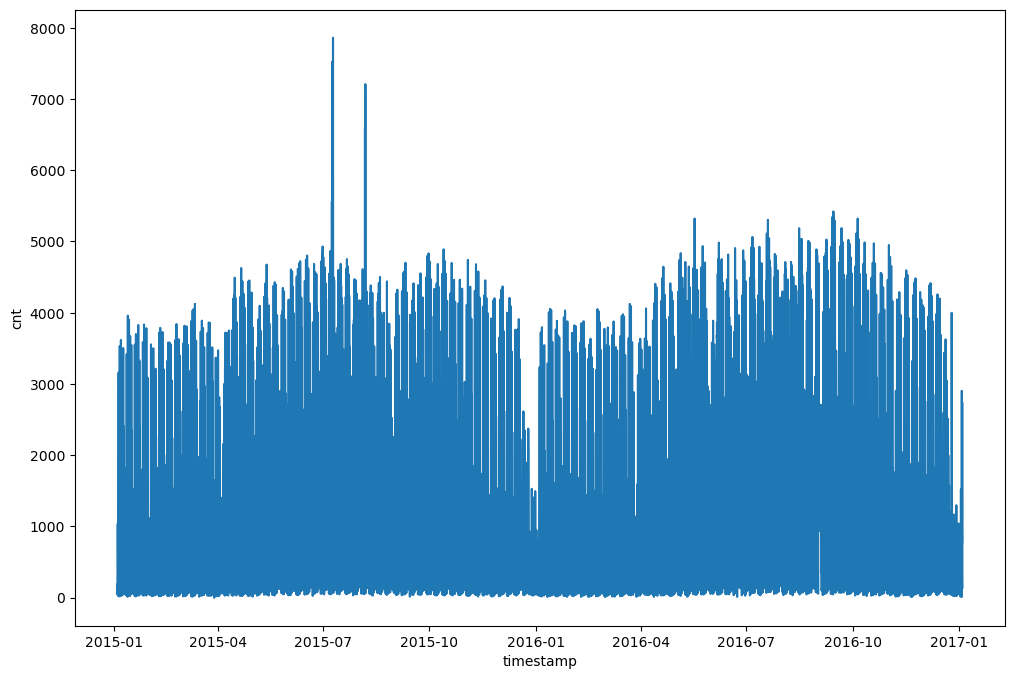

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = df, x = df.timestamp, y = df.cnt)

In [25]:
df.sort_values(by = 'timestamp', inplace = True)
df.set_index ('timestamp', drop = False, inplace = True)

<Axes: xlabel='timestamp'>

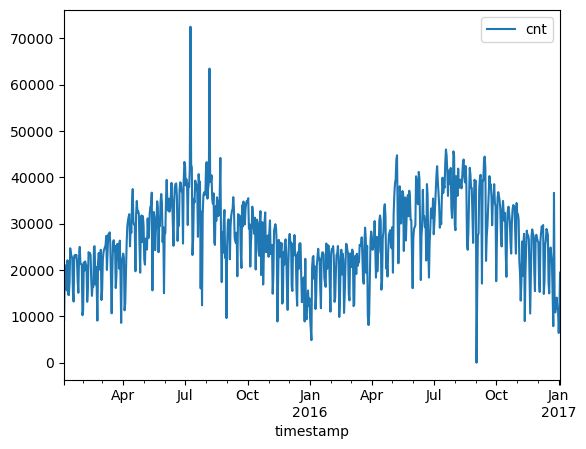

In [30]:

df.resample('D').agg({'cnt' : 'sum'}).plot()

In [31]:
df_by_day = df.resample('D').cnt.sum().reset_index() # количество поездок по дням


In [32]:
df_by_day

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


In [38]:
df_by_roll = df.resample('D').cnt.sum().rolling (3).mean().reset_index()

In [39]:
df_by_roll

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


In [41]:
df_by_roll.query('timestamp =="2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


In [46]:
# СЧИТАЕМ РАЗНИЦУ
round(np.std(df_by_day['cnt'] - df_by_roll['cnt']),2)

4558.59

In [73]:
std = round(np.std(df_by_day['cnt'] - df_by_roll['cnt']),2) # выводим среднее отклонение

In [50]:
std

4558.59

In [52]:
upper_bound = df_by_roll.cnt +(2.576 * std)
lower_bound = df_by_roll.cnt -(2.576 * std)

In [53]:
upper_bound

0               NaN
1               NaN
2      28482.594507
3      32425.927840
4      30835.594507
           ...     
726    24424.927840
727    24090.261173
728    21546.594507
729    21632.261173
730    24302.927840
Name: cnt, Length: 731, dtype: float64

In [55]:
df_by_day['upper_bound'] = upper_bound
df_by_day['lower_bound'] = lower_bound




In [56]:
df_by_day

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.594507,4996.738827
3,2015-01-07,21064,32425.927840,8940.072160
4,2015-01-08,15601,30835.594507,7349.738827
...,...,...,...,...
726,2016-12-30,11566,24424.927840,939.072160
727,2016-12-31,11424,24090.261173,604.405493
728,2017-01-01,6421,21546.594507,-1939.261173
729,2017-01-02,11823,21632.261173,-1853.594507


In [66]:
round(upper_bound.loc[730],2) # ВЕРХНЯЯ ГРАНИЦА ИНТЕРВАЛА

24302.93

In [68]:
round(lower_bound.loc[730],2) # НИЖНЯЯ ГРАНИЦА ИНТЕРВАЛА

817.07

In [69]:
df_by_day[df_by_day.cnt>df_by_day.upper_bound]

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.927840,38962.072160
214,2015-08-06,63468,58370.261173,34884.405493
609,2016-09-04,27512,26001.927840,2516.072160
721,2016-12-25,36653,31393.594507,7907.738827


In [70]:
df_by_day[df_by_day.cnt<df_by_day.lower_bound]

,timestamp,cnt,upper_bound,lower_bound
130,2015-05-14,15609,40452.261173,16966.405493
189,2015-07-12,23240,47779.594507,24293.738827
201,2015-07-24,16034,42756.594507,19270.738827
232,2015-08-24,17400,41272.261173,17786.405493
314,2015-11-14,8898,32780.261173,9294.405493
607,2016-09-02,0,37829.261173,14343.405493
615,2016-09-10,17080,43004.927840,19519.072160
621,2016-09-16,21967,47936.261173,24450.405493
678,2016-11-12,8990,32620.927840,9135.072160


In [72]:
df['2016-09-01' : '2016-09-03'] # анализ почему в данных оказался 0

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2016-09-01 00:00:00,2016-09-01 00:00:00,322,18.0,18.0,68.0,15.0,1.0,0.0,0.0,2.0
2016-09-01 01:00:00,2016-09-01 01:00:00,186,17.0,17.0,73.0,16.0,1.0,0.0,0.0,2.0
2016-09-01 02:00:00,2016-09-01 02:00:00,89,16.5,16.5,75.0,16.0,1.0,0.0,0.0,2.0
2016-09-01 03:00:00,2016-09-01 03:00:00,56,16.0,16.0,74.5,11.0,2.0,0.0,0.0,2.0
2016-09-01 04:00:00,2016-09-01 04:00:00,64,16.0,16.0,77.0,12.0,2.0,0.0,0.0,2.0
2016-09-01 05:00:00,2016-09-01 05:00:00,133,15.0,15.0,82.0,11.0,2.0,0.0,0.0,2.0
2016-09-01 06:00:00,2016-09-01 06:00:00,811,15.0,15.0,82.0,12.0,2.0,0.0,0.0,2.0
2016-09-01 07:00:00,2016-09-01 07:00:00,2663,16.0,16.0,77.0,11.0,2.0,0.0,0.0,2.0
2016-09-01 08:00:00,2016-09-01 08:00:00,4631,16.5,16.5,75.0,9.0,2.0,0.0,0.0,2.0
